In [68]:
import pandas as pd
import statistics as sts
import seaborn as sns

# Prática sobre limpeza e tratamento de dados
## Dados de clima
### Regras de Negócio
* Aparência: sol, nublado, chuva
* Temperatura: -130 ~ 130 F
* Umidade: 0 ~ 100
* Jogar: sim/não 
* Tratar valores NaNs

### Importação dos dados

In [69]:
data_set = pd.read_csv('../dados/tempo.csv', sep=';')
data_set

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


### Com os dados importados, podemos fazer a análise exploratoria para conseguir encontrar inconsistencias nos dados
## Análise Exploratória dos Dados

In [70]:
data_set.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [71]:
data_set.describe()

,Temperatura,Umidade
count,14.000000,13.000000
mean,155.571429,89.769231
std,306.433759,34.540203
min,64.000000,65.000000
25%,69.250000,70.000000
50%,73.500000,85.000000
75%,80.750000,90.000000
max,1220.000000,200.000000


In [72]:
data_set.shape

(14, 5)

In [73]:
#Explorar dados categoricos
#Aparencia
group = data_set.groupby('Aparencia').size()
group

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

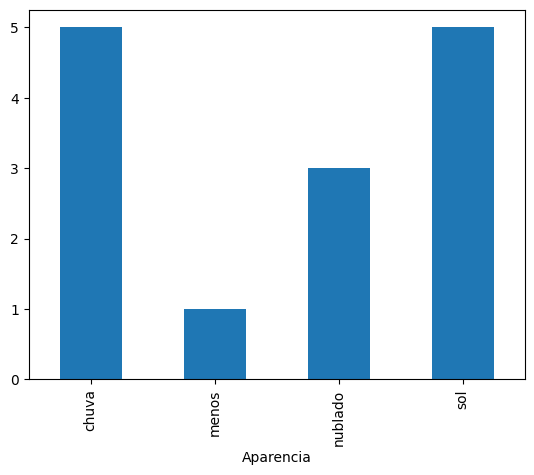

In [74]:
group.plot.bar('grey')

In [75]:
#Vento
group = data_set.groupby('Vento').size()
group

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

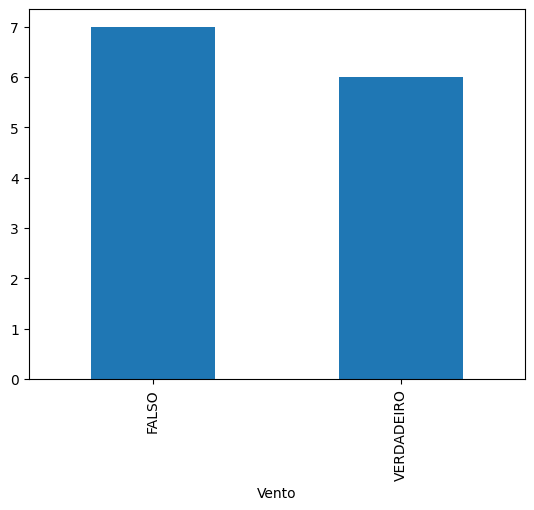

In [76]:
group.plot.bar()

In [77]:
#Jogar
group = data_set.groupby('Jogar').size()
group

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

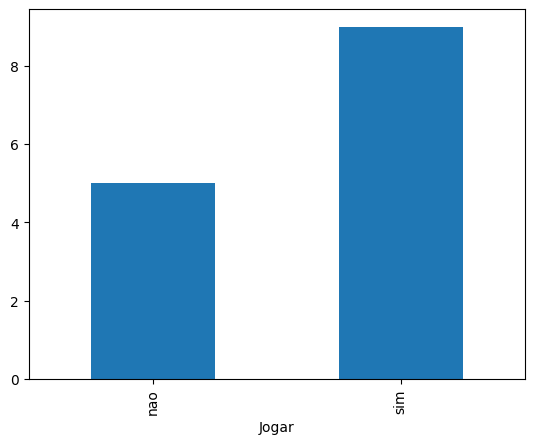

In [78]:
group.plot.bar()

In [79]:
#Explorar Dados númericos
#Temperatura
data_set['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

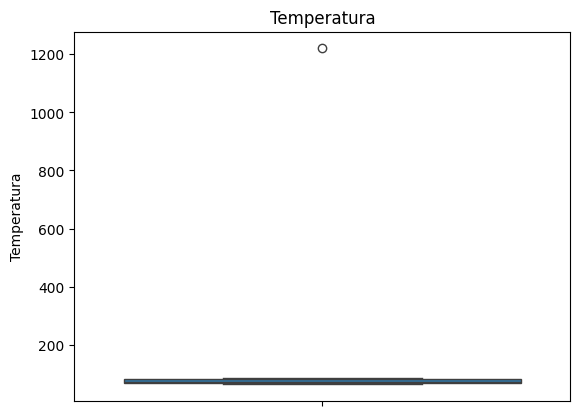

In [80]:
sns.boxplot(data_set['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

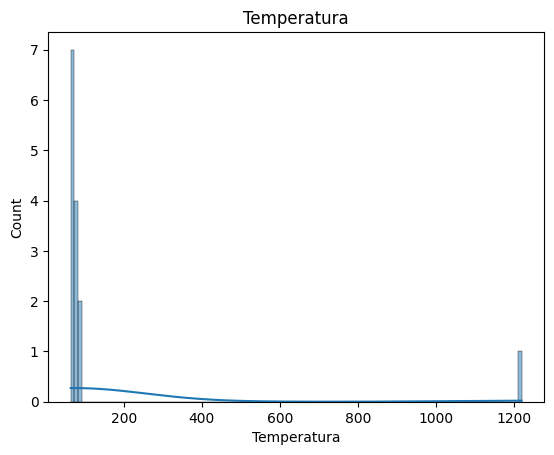

In [81]:
sns.histplot(data_set['Temperatura'], kde='kde').set_title("Temperatura")

In [82]:
#Umidade
data_set['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

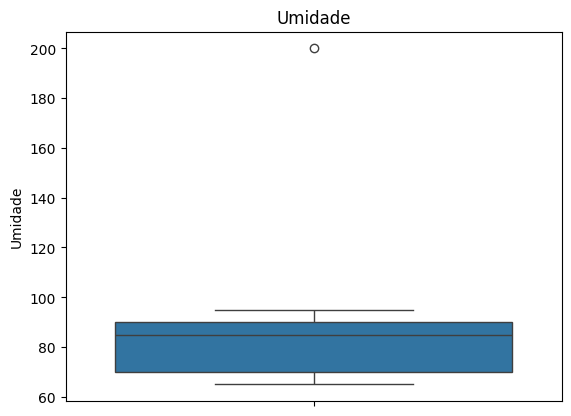

In [83]:
sns.boxplot(data_set['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

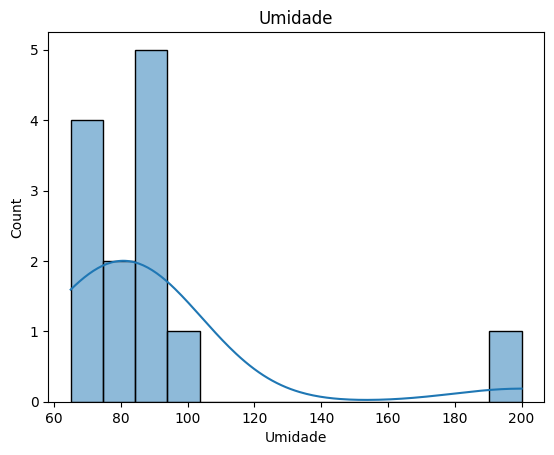

In [84]:
sns.histplot(data_set['Umidade'],binwidth=10, kde='kde').set_title('Umidade')

### Com os possiveis problemas encontrados, agora vêm o tratamento dos dados

In [85]:
#Valores NaNs
data_set.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [86]:
#Umidade
data_set['Umidade']

0      85.0
1      90.0
2      86.0
3       NaN
4      80.0
5      70.0
6      65.0
7      95.0
8      70.0
9     200.0
10     70.0
11     90.0
12     75.0
13     91.0
Name: Umidade, dtype: float64

In [87]:
data_set['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [88]:
median = sts.median(data_set['Umidade'])
median

85.5

In [89]:
data_set['Umidade'].fillna(median, inplace=True)
data_set

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [90]:
# Vento
group = data_set.groupby('Vento').size()
group

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [91]:
data_set['Vento'].isnull().sum()

1

In [92]:
data_set['Vento'].fillna('FALSO', inplace=True)
data_set

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,85.5,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,FALSO,sim


In [93]:
data_set['Vento'].isnull().sum()

0

In [94]:
data_set.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

### Valores NaNs tratados

In [95]:
#Aparencia
data_set.groupby('Aparencia').size()

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [96]:
data_set.loc[data_set['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
data_set.groupby('Aparencia').size()

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [97]:
#Temperatura
data_set['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [98]:
data_set.loc[(data_set['Temperatura'] < -130) | (data_set['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [99]:
data_set.loc[(data_set['Temperatura'] < -130) | (data_set['Temperatura'] > 130), 'Temperatura'] = sts.median(data_set['Temperatura'])
data_set.loc[(data_set['Temperatura'] < -130) | (data_set['Temperatura'] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [100]:
#Umidade
data_set['Umidade'].describe()

count     14.000000
mean      89.464286
std       33.204763
min       65.000000
25%       71.250000
50%       85.250000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [101]:
data_set.loc[(data_set['Umidade'] < 0) | (data_set['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,FALSO,sim


In [102]:
data_set.loc[(data_set['Umidade'] < 0) | (data_set['Umidade'] > 100), 'Umidade'] = sts.median(data_set['Umidade'])
data_set.loc[(data_set['Umidade'] < 0) | (data_set['Umidade'] > 100)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [103]:
#Jogar
data_set.groupby('Jogar').size()

Jogar
nao    5
sim    9
dtype: int64

### Tudo tratado seguindo o modelo de negocio